#### Import the packages required

In [1]:
import numpy as np  #for the mathematical operations

import matplotlib.pyplot as plt  #for the graphs and plots

import pandas as pd  #operations on the csv file

from keras.models import Sequential  #sequential - a linear stack of layers
from keras.layers import Dense , Dropout , Lambda, Flatten  #operations on the layers
from keras.optimizers import Adam ,RMSprop  #learning rate,momentum gradient descent 
from sklearn.model_selection import train_test_split  #split the data into test and train
from keras import backend as K  
from keras.preprocessing.image import ImageDataGenerator


from subprocess import check_output

Using TensorFlow backend.


### Some info about the above modules imported-

There are two types of models for keras- 
1. Sequential 
The sequential API allows you to create models layer-by-layer for most problems. 
It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
2. Funcional 
The functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

Operations on layers-
- Dense
A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected.
- Dropout 
Dropout is a method to tackle overfitting in the model.
- Flatten
https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

- Keras ImageDataGenrator-
Used to  perform image augmentation by directly reading the CSV files through pandas dataframe.


Pandas Dataframe-
A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.




In [2]:
train = pd.read_csv("../data/digit/train.csv")
#print(train.shape)
#train.head()

In [3]:
test = pd.read_csv("../data/digit/test.csv")
#print(test.shape)
#test.head()

In [4]:
X_train = (train.iloc[:,1:].values).astype('float32') 
y_train = train.iloc[:,0].values.astype('int32')
X_test = (train.iloc[:,1:].values).astype('float32') 

In [13]:
#X_train

In [14]:
#y_train

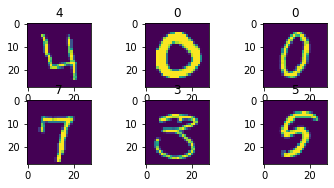

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28) #covert the dataset (num_images, img_rows, img_cols) format

for i in range(3,9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(y_train[i])

330 - 3 X 3 grid, 0th subplot


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [7]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape


(42000, 28, 28, 1)

### Preprocessing the images-
A common methodology-
1. Resize- The images may vary in size which can affect the performance of our AI model.
2. Denoise- The goal is to determine the original image by suppresing the noise of the noise-contaminated version of the image.
3. Image segmentation- It is basically the partition of the image into various parts or regions often based on the characteristics of the pixels.
4. Smoothing- It is used to produce a less-pixeleted image. (Low-pass and high-pass filter)

Since we are using MNIST dataset the images are without much noise.
Here we are using feature scaling to normalize the data within a particular range. This will help to increase the speed of our algo.

Formula-
- z = (x-u)/s, where u = Mean, s = Standard

In [8]:
u = X_train.mean().astype(np.float32)
s = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-u)/s

### One Hot encoding of labels.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. 
In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [9]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [10]:
model = Sequential()
model.add(Lambda(standardize, input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
print(model.input_shape)
print(model.output_shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(None, 28, 28, 1)
(None, 10)


### Activation Function-

In a neural network, numeric data points, called inputs, are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.

The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer.

Linear and non-linear activation functions, the NN use non-linear activation functions so they can train on more complex data.
Types of non-linear funcations-
1. Sigmoid
2. TanH
3. ReLU
4. Softmax
5. Swish

In [11]:
model.compile(optimizer=RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

A loss function: to measure how good the network is

An optimizer: to update network as it sees more data and reduce loss value

Metrics: to monitor performance of network

In [12]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

### Cross-Validation- 
A nice video to explain the concepts of cross-validation
https://www.youtube.com/watch?v=fSytzGwwBVw

In [13]:
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
# here we are using 10-fold cross validation
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [21]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)


Epoch 1/3
37800/37800 [==============================] - 109s 3ms/step - loss: 0.2410 - accuracy: 0.9337 - val_loss: 0.2632 - val_accuracy: 0.9102
Epoch 2/3
37800/37800 [==============================] - 109s 3ms/step - loss: 0.2171 - accuracy: 0.9411 - val_loss: 0.5790 - val_accuracy: 0.9030
Epoch 3/3
37800/37800 [==============================] - 108s 3ms/step - loss: 0.2114 - accuracy: 0.9427 - val_loss: 0.2980 - val_accuracy: 0.9084


Model.fit - Trains the model for a fixed number of epochs (iterations on a dataset).

Arguments- 
- x: Input data
- y: Target data
- batch_size: Number of samples per gradient update
- epochs: An epoch is an iteration over the entire x and y data provided
- validation_split: Fraction of the training data to be used as validation data. 
- validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
- validation_steps: Only relevant if validation_data is provided and is a generator. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

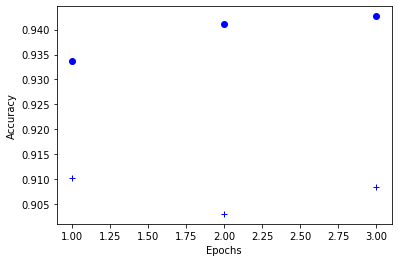

In [26]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Make a fully connected layer-

In [15]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
fc = get_fc_model()
fc.optimizer = RMSprop(lr=0.01)

In [34]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 255s 7ms/step - loss: 0.0973 - accuracy: 0.9896 - val_loss: 2.5375 - val_accuracy: 0.9738


Trying a new activation function- 'Swish'

In [17]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [18]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [19]:
def get_sw_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='swish'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [20]:
sw = get_sw_model()
sw.optimizer = RMSprop(lr=0.01)

In [58]:
history=sw.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 262s 7ms/step - loss: 0.0797 - accuracy: 0.9886 - val_loss: 1.4933 - val_accuracy: 0.9698
